In [24]:
import datetime

In [1]:
import os
os.chdir('../../src/models/')

from spread_model import simulate_pandemic
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
pr_home = .3
p_r = {
    'work':pr_home/40, 'school':(2*pr_home)/40, 'home':pr_home, 'neighbor':pr_home/80}

sim = simulate_pandemic(initial_infection = .0001, p_r = p_r, policy=True, file_path='SP_multiGraph.gpickle')



100%|██████████| 500/500 [09:53<00:00,  1.19s/it]


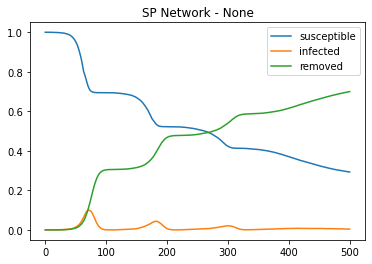

In [22]:
def plot_SIR_timeline(time_series, name=None, save=False):
    plt.plot(time_series.index, time_series['susceptible'], label = 'susceptible')
    plt.plot(time_series.index, time_series['infected'], label = 'infected')
    plt.plot(time_series.index, time_series['removed'], label = 'removed')
    plt.legend()
    plt.title(f'SP Network - {name}')
    if save: plt.savefig(f'SP network Simulation- {name}.png', fromat='png', dpi = 300)
    plt.show()

plot_SIR_timeline(sim[0])

In [42]:
def plot_beds_capacity(timeline):
    fig = go.Figure()
    x = pd.date_range(datetime.date(2020, 2, 24), periods=len(timeline))

    fig.add_trace(go.Scatter(x=x, y=timeline['hospitalized'],
        mode='lines',
        line_color='darkorchid',
         name="Hospitalized"
        ))

    fig.add_trace(go.Scatter(x=x, y=len(x)*[0.0025],
        mode='lines',
        line_color='firebrick',
         name="Capacity"
        ))
    
    fig.show()
    
plot_beds_capacity(sim[0])

In [47]:
def plot_SIR_timeline(timeline, name=None, save=False):
    fig = go.Figure()
    x = pd.date_range(datetime.date(2020, 2, 24), periods=len(timeline))
    
    fig.add_trace(go.Scatter(x=x, y=timeline['susceptible'],
            mode='lines',
            line_color='blue',
            name="susceptible"))
    
    fig.add_trace(go.Scatter(x=x, y=timeline['infected'],
            mode='lines',
            line_color='red',
            name="infectious"))
    
    fig.add_trace(go.Scatter(x=x, y=timeline['exposed'],
            mode='lines',
            line_color='orange',
            name="exposed"))
    

    fig.add_trace(go.Scatter(x=x, y=timeline['removed'],
            mode='lines',
            line_color='green',
            name="removed"))
    
    fig.add_trace(go.Scatter(x=x, y=timeline['hospitalized'],
            mode='lines',
            line_color='darkorchid',
            name="hospitalized"))
        
    fig.add_trace(go.Scatter(x=x, y=len(x)*[0.0025],
        mode='lines',
        line_color='firebrick',
         name="Capacity"
        ))
    
    fig.show()
    
plot_SIR_timeline(sim[0])

In [48]:
pr_home = .3
p_r = {
    'work':pr_home/40, 'school':(2*pr_home)/40, 'home':pr_home, 'neighbor':pr_home/80}

sim_natural = simulate_pandemic(initial_infection = .0001, p_r = p_r, 
                                    policy=False, file_path='SP_multiGraph.gpickle')



 36%|███▌      | 178/500 [03:26<06:12,  1.16s/it]


In [49]:
plot_SIR_timeline(sim_natural[0])